In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs 

In [25]:
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=42)

In [26]:
X 

array([[-7.38770342, -7.78901793],
       [ 5.12798917,  1.23465109],
       [-2.79088225,  9.33982215],
       [ 5.48155542,  1.13205905],
       [-6.66495477, -6.54363888],
       [ 4.04555704,  1.63339105],
       [-2.31043956,  9.5996132 ],
       [ 4.5080757 ,  2.18743723],
       [ 4.69812537,  2.55435668],
       [-3.19979377,  9.23970494],
       [-2.83582726,  9.08083968],
       [-6.74315123, -6.09582394],
       [-6.56646225, -6.70191879],
       [-3.17299861,  8.29656215],
       [-2.06611768,  9.1171071 ],
       [-7.52216269, -6.59062614],
       [-6.71361271, -6.38379964],
       [-2.5524037 ,  9.61640587],
       [-7.40994165, -6.78787453],
       [-6.59568462, -6.92380694],
       [-2.78724824,  8.73484828],
       [-6.92588822, -6.67541841],
       [-7.14753616, -6.36627032],
       [-2.29236026,  9.93710807],
       [-2.53069325,  9.95307232],
       [-2.78558089,  9.64855946],
       [ 3.79065639,  1.72078249],
       [-6.50422678, -7.39440413],
       [-7.46443619,

In [27]:
y_true

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [28]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [29]:
df

,Feature1,Feature2
0,-7.387703,-7.789018
1,5.127989,1.234651
2,-2.790882,9.339822
3,5.481555,1.132059
4,-6.664955,-6.543639
...,...,...
95,-2.915351,9.381292
96,-1.890598,9.573054
97,4.543107,2.215600
98,-6.229796,-6.247828


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
interia = []
k_range= range(1, 11)

In [32]:
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  interia.append(kmeans.inertia_)

In [33]:
interia

[200.00000000000009,
 59.93027512966685,
 2.0331401136396376,
 1.744067842287665,
 1.48264069625492,
 1.390761351133011,
 1.1422705097654797,
 0.9740243472092622,
 0.9155190035597238,
 0.7641617436454586]

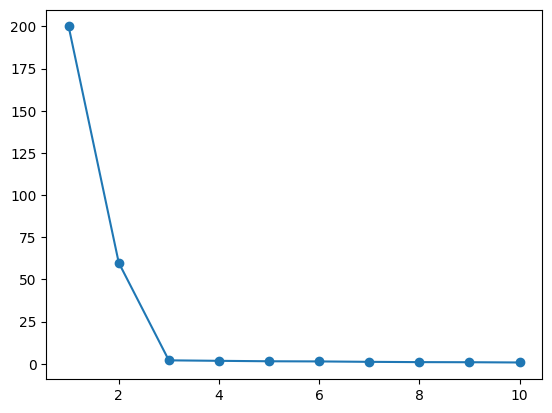

In [34]:
plt.plot(k_range, interia, marker='o')

In [35]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [36]:
cluster_lables = kmeans_final.fit_predict(X_scaled)

In [37]:
cluster_lables

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [38]:
df['clusters'] = cluster_lables

In [39]:
df  

,Feature1,Feature2,clusters
0,-7.387703,-7.789018,1
1,5.127989,1.234651,2
2,-2.790882,9.339822,0
3,5.481555,1.132059,2
4,-6.664955,-6.543639,1
...,...,...,...
95,-2.915351,9.381292,0
96,-1.890598,9.573054,0
97,4.543107,2.215600,2
98,-6.229796,-6.247828,1


<Axes: xlabel='Feature1', ylabel='Feature2'>

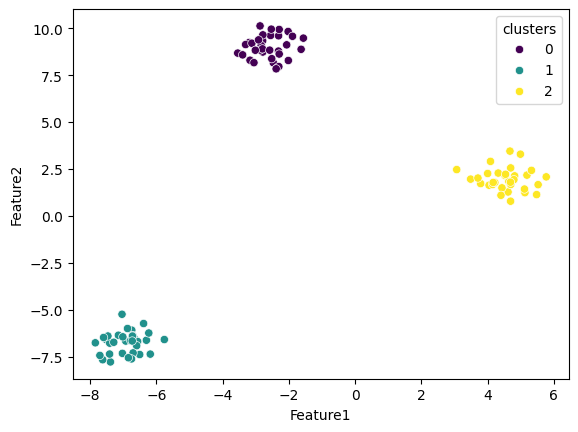

In [40]:
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='clusters', palette='viridis')